In [25]:
# This is to remove test data from windowed data for training
import os
training_years = ['2020', '2021']
for window_data in os.listdir():
    if 'OBSEA_' not in window_data:
        continue
    
    for fname in os.listdir(window_data + '/OBSEA'):
        if '_label' not in fname:
            continue
        
        year = fname[:4]
        if year not in training_years:
            os.remove(window_data + '/OBSEA/' + fname)
            fname = fname.replace('_label', '')
            os.remove(window_data + '/OBSEA/' + fname)

In [26]:
# prepare train_val_split
from sklearn.model_selection import train_test_split
import pandas as pd

# read metrics generated by create_window_data
df = pd.read_csv('../metrics.csv', index_col=0)
df = df[(df.index.str.contains('2020')) | (df.index.str.contains('2021'))]# | (df.index.str.contains('2021'))] 

# remove rows that have many detectors yielding the same highest score
threshold = 2
max_values = df.max()
is_max = df.eq(max_values)
rows_to_delete = is_max.sum(axis=1) >= threshold
df = df[~rows_to_delete]

# now find the max
df['label'] = df.idxmax(axis=1)
df['label'].value_counts()

# split data for training and valication
validation_size = 0.15
num_samples = len(df)
val_samples = int(num_samples * validation_size)

# Get counts of each class to balance
class_counts = df['label'].value_counts()
min_class_val_size = int(val_samples / len(class_counts))  # Equal number from each class

# Collect indices for the validation set
val_indices = []
for label in class_counts.index:
    indices = df[df['label'] == label].index.tolist()
    val_indices.extend(indices[:min_class_val_size])

# Remaining indices are for training
train_indices = list(set(df.index) - set(val_indices))

# Split the data
train_df = df.loc[train_indices]
val_df = df.loc[val_indices]

In [27]:
print(f"Training Set Size: {train_df.shape[0]}")
print(f"Validation Set Size: {val_df.shape[0]}")
print("\nTraining Set Distribution:")
print(train_df['label'].value_counts())
print("\nValidation Set Distribution:")
print(val_df['label'].value_counts())


Training Set Size: 232
Validation Set Size: 36

Training Set Distribution:
RobustPCA                     52
DeepAnT                       30
HBOS                          29
CBLOF                         29
LOF                           23
PCC                           21
DenoisingAutoEncoder (DAE)    20
AutoEncoder (AE)              20
COPOD                          8
Name: label, dtype: int64

Validation Set Distribution:
RobustPCA                     4
DeepAnT                       4
HBOS                          4
CBLOF                         4
LOF                           4
PCC                           4
DenoisingAutoEncoder (DAE)    4
AutoEncoder (AE)              4
COPOD                         4
Name: label, dtype: int64


In [28]:
train_df = train_df.index.tolist() 
val_df = val_df.index.tolist() 
train_df = [x + '.csv' for x in train_df]
val_df = [x + '.csv' for x in val_df]
data2df = {'train_set': train_df,
           'val_set': val_df}
data2df = pd.DataFrame.from_dict(data2df, orient='index')
data2df.to_csv('train_val_split.csv')

In [29]:
# remember to move train_val_split.csv to reproducibility_guide/

In [30]:
df

,AutoEncoder (AE),DenoisingAutoEncoder (DAE),DeepAnT,PCC,HBOS,CBLOF,COPOD,RobustPCA,LOF,label
OBSEA/2020-05-27.out,0.678977,0.678577,0.987005,0.714458,0.736053,0.734519,0.785561,0.901668,0.734519,DeepAnT
OBSEA/2020-07-08.out,0.652696,0.661828,0.496203,0.678546,0.666330,0.654627,0.662490,0.562447,0.654627,PCC
OBSEA/2021-09-29.out,0.000000,0.000000,0.915094,1.000000,0.084906,0.619946,0.074124,0.000000,0.350404,PCC
OBSEA/2020-08-02.out,0.902303,0.976182,0.952000,0.976596,0.886623,0.843584,0.961084,0.932983,0.903464,PCC
OBSEA/2021-12-30.out,0.417790,0.128032,0.466307,0.000000,0.809973,0.609164,0.420485,0.000000,0.707547,HBOS
...,...,...,...,...,...,...,...,...,...,...
OBSEA/2020-07-04.out,0.276586,0.247496,0.077711,0.128006,0.549372,0.373197,0.563048,0.525364,0.373197,COPOD
OBSEA/2020-07-03.out,0.194994,0.237463,0.143074,0.143474,0.721854,0.707978,0.143701,0.149065,0.707978,HBOS
OBSEA/2020-09-28.out,0.097035,0.045822,0.000000,0.000000,0.000000,0.051213,0.000000,0.374663,1.000000,LOF
OBSEA/2021-11-27.out,0.667116,0.811321,0.000000,0.000000,0.000000,0.380054,0.000000,0.919137,0.365229,RobustPCA


/tmp/ipykernel_1988921/2363506797.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Oracle'] = df.max(axis=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AutoEncoder (AE)'),
  Text(1, 0, 'DenoisingAutoEncoder (DAE)'),
  Text(2, 0, 'DeepAnT'),
  Text(3, 0, 'PCC'),
  Text(4, 0, 'HBOS'),
  Text(5, 0, 'CBLOF'),
  Text(6, 0, 'COPOD'),
  Text(7, 0, 'RobustPCA'),
  Text(8, 0, 'LOF'),
  Text(9, 0, 'Oracle')])

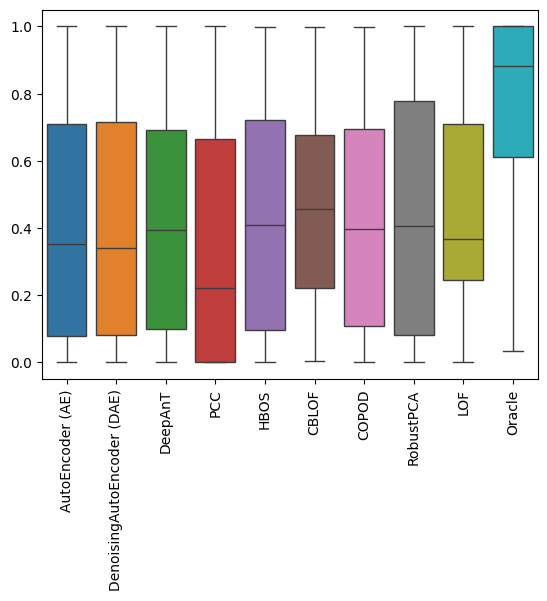

In [31]:
#df = all_metric.copy()
#rows_to_remove = all_metric.eq(df.iloc[:, 0], axis=0).all(axis=1)
#df = df[~rows_to_remove]
import numpy as np
df['Random'] = df.apply(lambda x: np.random.choice(x), axis=1)
df['Oracle'] = df.max(axis=1)

#print(len(all_metric), len(df))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df, showfliers=False, orient='v')
plt.xticks(rotation=90)

In [32]:
fnames2keep = df.index.str.replace('OBSEA/', '').str.replace('.out', '')
fnames2keep = list(fnames2keep)

/tmp/ipykernel_1988921/4000371863.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  fnames2keep = df.index.str.replace('OBSEA/', '').str.replace('.out', '')


In [33]:
# This is to remove test data from windowed data for training (clean again)
import os
for window_data in os.listdir():
    if 'OBSEA_' not in window_data:
        continue
    
    for fname in os.listdir(window_data + '/OBSEA'):
        if '_label' not in fname:
            continue

        day = fname[:10]
        if day not in fnames2keep:
            os.remove(window_data + '/OBSEA/' + fname)
            fname = fname.replace('_label', '')
            os.remove(window_data + '/OBSEA/' + fname)

In [24]:
sorted(fnames2keep)

['2020-01-02',
 '2020-01-03',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-09',
 '2020-01-14',
 '2020-01-15',
 '2020-01-19',
 '2020-01-22',
 '2020-03-22',
 '2020-03-27',
 '2020-03-28',
 '2020-04-05',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-14',
 '2020-04-15',
 '2020-04-23',
 '2020-04-24',
 '2020-05-01',
 '2020-05-05',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-12',
 '2020-05-15',
 '2020-05-16',
 '2020-05-25',
 '2020-05-27',
 '2020-06-01',
 '2020-06-02',
 '2020-06-03',
 '2020-06-04',
 '2020-06-06',
 '2020-06-07',
 '2020-06-11',
 '2020-06-12',
 '2020-06-13',
 '2020-06-14',
 '2020-06-15',
 '2020-06-17',
 '2020-06-18',
 '2020-06-19',
 '2020-06-20',
 '2020-06-21',
 '2020-06-24',
 '2020-06-26',
 '2020-06-27',
 '2020-06-29',
 '2020-07-01',
 '2020-07-02',
 '2020-07-03',
 '2020-07-04',
 '2020-07-06',
 '2020-07-07',
 '2020-07-08',
 '2020-07-12',
 '2020-07-13',
 '2020-07-15',
 '2020-07-16',
 '2020-07-17',
 '2020-07-18',
 '2020-07-